$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge return$ $\hspace{0.1cm}$ $\Huge masks$ $\Huge :$ 

# Modules : 

In [2]:
%matplotlib inline
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
from astropy import constants as cst
from astropy.cosmology import FlatLambdaCDM
import pysm as pysm
import ccatp_sky_model as sky

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.7255)
T_CMB = cosmo.Tcmb0.si.value
k_B = cst.k_B.value
h = cst.h.value
c = cst.c.value

In [6]:
os_path = "/vol/arc3/data1/sz/CCATp_sky_model/templates/masks/"

# Function : 

In [7]:
def return_mask(survey, nside_out = 256, coord = 'G'):

    '''Returns the specified all-sky survey map. 
    
    Parameters
    ----------
    survey: sting
        Defines which survey mask will be returned. The options are 'advACT', 'SPT',
        'Dust', and 'NVSS'. 
    nside_out: float, optional
        Healpix nside parameter of the output map. Must be a valid value for nside.
        Default: 256
    coord: sting, optional
        Defines the coordinate system of the output mask. 'G' --> Galactic, 
        'E' --> Ecliptic, 'C' --> Equatorial. Default: 'G'
    
    Returns
    -------
    mask: float array
        Healpix all-sky mask.
    '''    
    
    #read mask
    if survey == 'advACT':
        mask = hp.read_map(os_path + 'Adv_ACT_survey_mask.fits', dtype = np.int16)  
    elif survey == 'SPT':
        mask = hp.read_map(os_path + 'SPT-SZ_survey_mask.fits', dtype = np.int16)
    elif survey == 'Dust':
        mask = hp.read_map(os_path + 'galactic_dust_mask.fits', dtype = np.int16)
    elif survey == 'NVSS':
        mask = hp.read_map(os_path + 'galactic_dust_nvss_mask.fits', dtype = np.int16)

    #change coordinate system if necessary
    if (coord == 'E') or (coord == 'C'):
        mask = hp.ud_grade(mask, nside_out = 2048)
        r = hp.Rotator(coord = ('G', coord))
        mask = hp.Rotator.rotate_map_pixel(r, mask)
        mask = hp.ud_grade(mask, nside_out = 256)
        mask[mask != 0] = 1

    #Re-bin map if necessary
    if nside_out != hp.get_nside(mask):
        mask = hp.ud_grade(mask, nside_out = nside_out)
        
    return(np.int16(mask))

# Launch : 

In [8]:
mask = return_mask(survey='Dust', nside_out = 256, coord = 'G')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


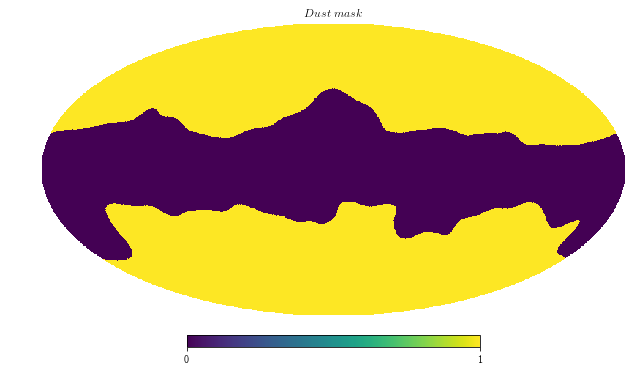

In [10]:
hp.mollview(mask, title="$Dust$ $mask$",unit='')

In [11]:
mask2 = return_mask(survey='Dust', nside_out = 256, coord = 'E')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


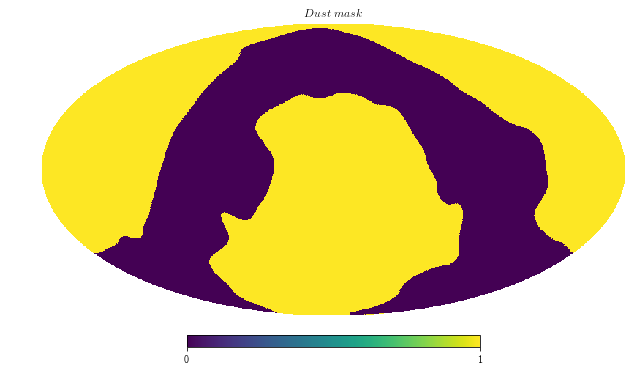

In [12]:
hp.mollview(mask2, title="$Dust$ $mask$",unit='')